In [1]:
import json
import networkx as nx
import torch
import torch_geometric.transforms as T
from matplotlib import pyplot as plt
from torch_geometric.utils import to_networkx

import glgexplainer.utils as utils
from glgexplainer.local_explainations import read_lattice, lattice_classnames
from glgexplainer.models import LEN, GLGExplainer, LEEmbedder
from gnn4ua.datasets.loader import Targets, GeneralisationModes

In [2]:
DATASET_NAME = Targets.Modular
generalisation_mode = GeneralisationModes.strong
task = DATASET_NAME
with open(f"config/{DATASET_NAME}_params.json") as json_file:
	hyper_params = json.load(json_file)

In [3]:
adjs_train, edge_weights_train, ori_classes_train, belonging_train, summary_predictions_train, le_classes_train = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='train'
)

adjs_test, edge_weights_test, ori_classes_test, belonging_test, summary_predictions_test, le_classes_test = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='test'
)

device = "cpu"  # torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = T.Compose([
	T.NormalizeFeatures(),
])

In [4]:
dataset_train = utils.LocalExplanationsDataset("data_glg", adjs_train, "same",
											   transform=transform,
											   y=le_classes_train,
											   belonging=belonging_train,
											   task_y=ori_classes_train)
dataset_test = utils.LocalExplanationsDataset("data_glg", adjs_test, "same",
											  transform=transform,
											  y=le_classes_test,
											  belonging=belonging_test,
											  task_y=ori_classes_test)

train_group_loader = utils.build_dataloader(dataset_train, belonging_train,
											num_input_graphs=128)
test_group_loader = utils.build_dataloader(dataset_test, belonging_test,
										   num_input_graphs=256)

/Users/luke/PycharmProjects/AI4UA/glgexplainer/utils.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attr=torch.tensor(t.weight).reshape(-1, 1),


In [5]:
torch.manual_seed(42)
len_model = LEN(hyper_params["num_prototypes"],
				hyper_params["LEN_temperature"],
				remove_attention=hyper_params["remove_attention"]).to(device)
le_model = LEEmbedder(num_features=hyper_params["num_le_features"],
					  activation=hyper_params["activation"],
					  num_hidden=hyper_params["dim_prototypes"]).to(device)
expl = GLGExplainer(len_model,
					le_model,
					device=device,
					hyper_params=hyper_params,
					classes_names=lattice_classnames,
					dataset_name=DATASET_NAME,
					num_classes=len(
						train_group_loader.dataset.data.task_y.unique())
					).to(device)

/Users/luke/.pyenv/versions/L65_Project/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


(array([0., 1., 2., 3.], dtype=float32), array([ 1755,  1090,   281, 17617]))
[0.99617743 0.00282598]


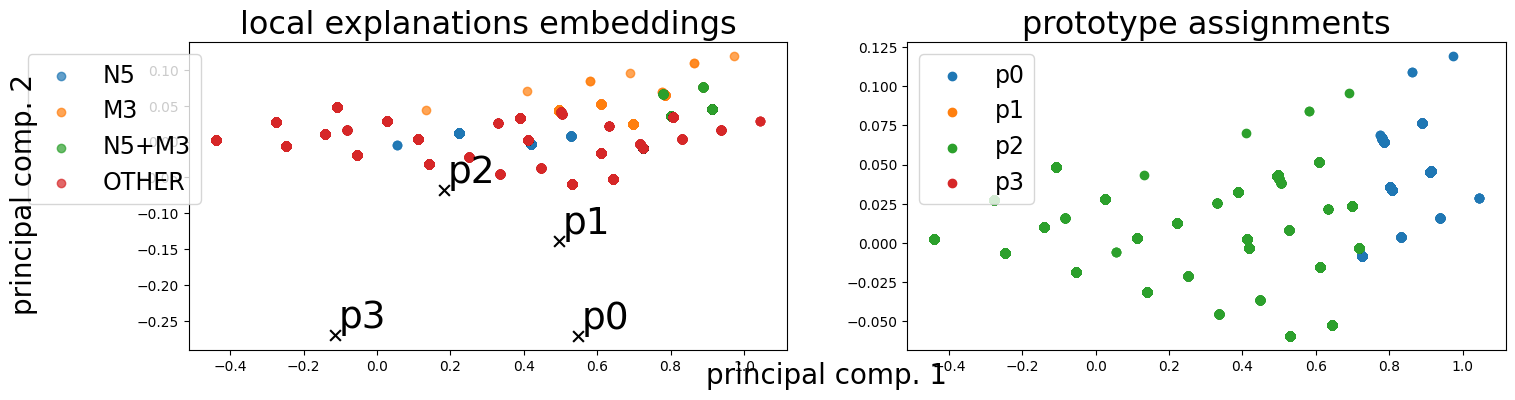

Alpha norms:
tensor([[1.0000, 0.8459, 0.8427, 0.9224],
        [0.8005, 0.7799, 1.0000, 0.8565]])
Concept Purity: 0.648990 +- 0.260405
Concept distribution:  (array([0, 2]), array([ 2190, 18553]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)
  1: Loss: 0.12124, LEN: 0.090480, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.10431, V. LEN 0.081
  2: Loss: 0.08343, LEN: 0.076230, Acc: 0.49, V. Acc: 0.82, V. Loss: 0.07611, V. LEN 0.065
  3: Loss: 0.07271, LEN: 0.068084, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.06842, V. LEN 0.061
  4: Loss: 0.06838, LEN: 0.065464, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.06358, V. LEN 0.058
  5: Loss: 0.06624, LEN: 0.064156, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.06070, V. LEN 0.057
  6: Loss: 0.06503, LEN: 0.063512, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05864, V. LEN 0.057
  7: Loss: 0.06316, LEN: 0.062034, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05619, V. LEN 0.055
  8: Loss: 0.06164, LEN: 0.060784, Acc: 0.78, V. Acc: 0

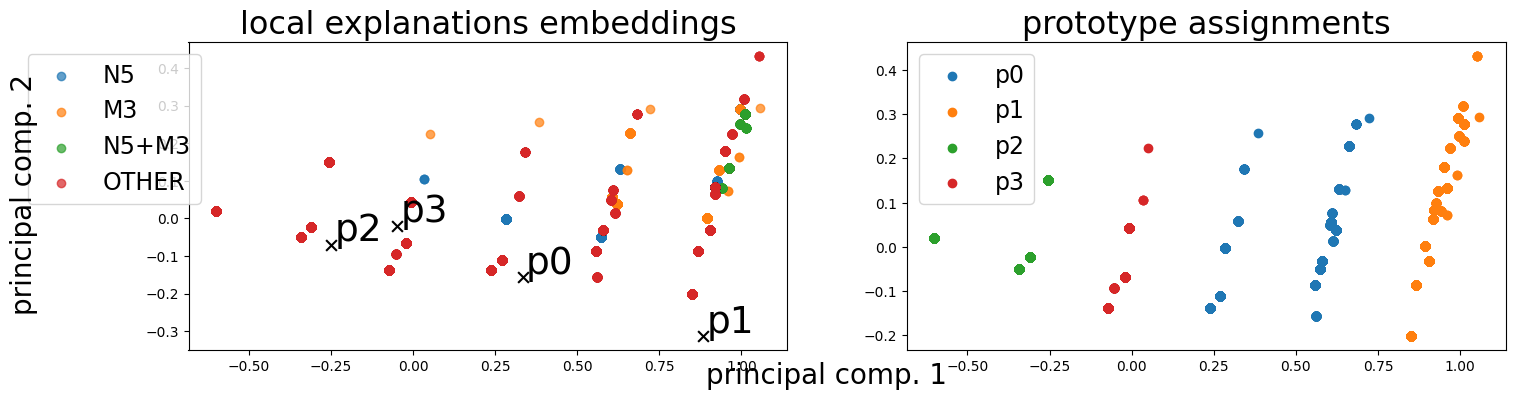

Alpha norms:
tensor([[0.3686, 0.1074, 0.1261, 1.0000],
        [0.0871, 0.0079, 0.0089, 1.0000]])
Concept Purity: 0.813761 +- 0.186843
Concept distribution:  (array([0, 1, 2, 3]), array([ 4362,  4066, 10043,  2272]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7821)

 20: Loss: 0.05844, LEN: 0.058118, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05441, V. LEN 0.053
 21: Loss: 0.05829, LEN: 0.057970, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05402, V. LEN 0.052
 22: Loss: 0.05840, LEN: 0.058081, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05453, V. LEN 0.053
 23: Loss: 0.05860, LEN: 0.058277, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05443, V. LEN 0.053
 24: Loss: 0.05885, LEN: 0.058528, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05479, V. LEN 0.053
 25: Loss: 0.05831, LEN: 0.058006, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05442, V. LEN 0.053
 26: Loss: 0.05879, LEN: 0.058459, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05484, V. LEN 0.053
 27: Loss: 0.05851, LEN: 0.058

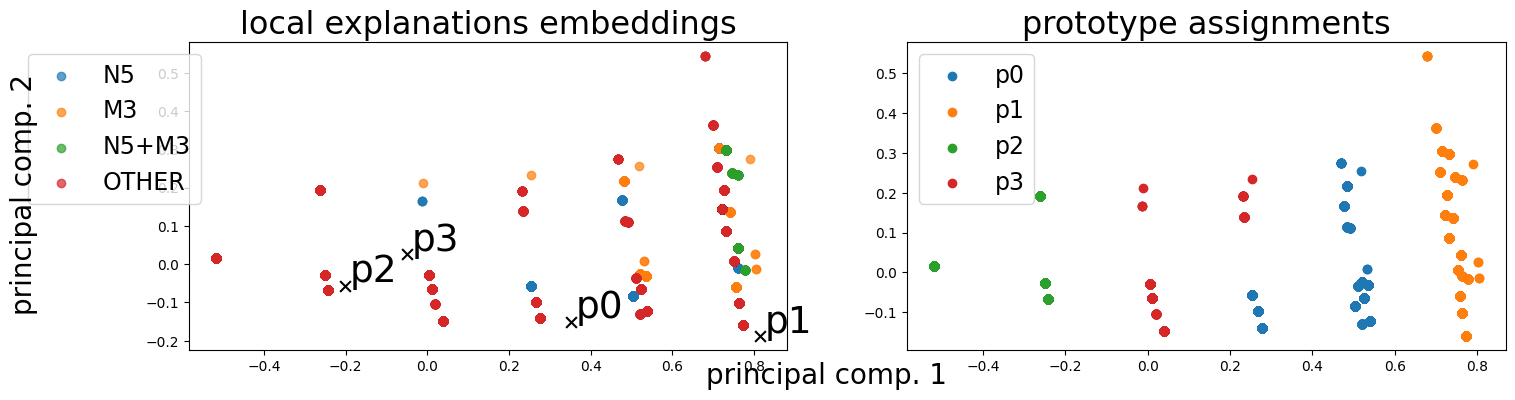

Alpha norms:
tensor([[0.3184, 0.1041, 0.1178, 1.0000],
        [0.0324, 0.0049, 0.0056, 1.0000]])
Concept Purity: 0.811324 +- 0.188713
Concept distribution:  (array([0, 1, 2, 3]), array([ 4241,  4066, 10043,  2393]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7821)

 40: Loss: 0.05892, LEN: 0.058646, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05426, V. LEN 0.053
 41: Loss: 0.05857, LEN: 0.058300, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05494, V. LEN 0.053
 42: Loss: 0.05856, LEN: 0.058321, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05420, V. LEN 0.053
 43: Loss: 0.05876, LEN: 0.058527, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05436, V. LEN 0.053
 44: Loss: 0.05868, LEN: 0.058441, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05421, V. LEN 0.053
 45: Loss: 0.05871, LEN: 0.058470, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05431, V. LEN 0.053
 46: Loss: 0.05869, LEN: 0.058442, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05493, V. LEN 0.054
 47: Loss: 0.05884, LEN: 0.058

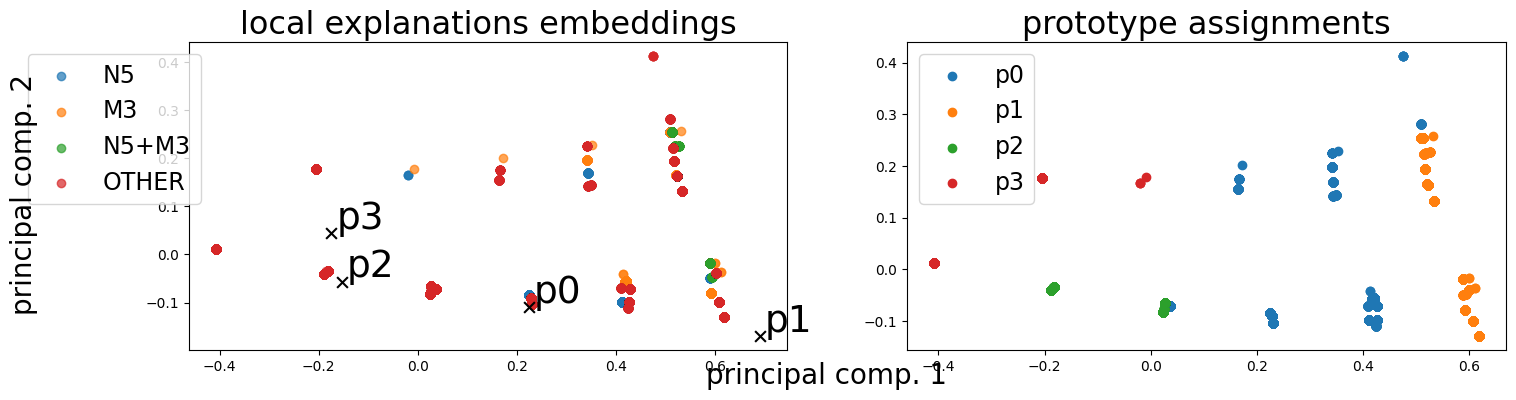

Alpha norms:
tensor([[0.3964, 0.1057, 0.1500, 1.0000],
        [1.0000, 0.0104, 0.0211, 0.1520]])
Concept Purity: 0.823246 +- 0.181110
Concept distribution:  (array([0, 1, 2, 3]), array([4987, 4009, 3236, 8511]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7821)

 60: Loss: 0.05832, LEN: 0.058102, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05532, V. LEN 0.055
 61: Loss: 0.05771, LEN: 0.057505, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05996, V. LEN 0.059
 62: Loss: 0.05758, LEN: 0.057420, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05677, V. LEN 0.056
 63: Loss: 0.05812, LEN: 0.057965, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05272, V. LEN 0.052
 64: Loss: 0.05816, LEN: 0.058012, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05702, V. LEN 0.056
 65: Loss: 0.05788, LEN: 0.057740, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05894, V. LEN 0.058
 66: Loss: 0.05800, LEN: 0.057871, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05862, V. LEN 0.058
 67: Loss: 0.05806, LEN: 0.057928,

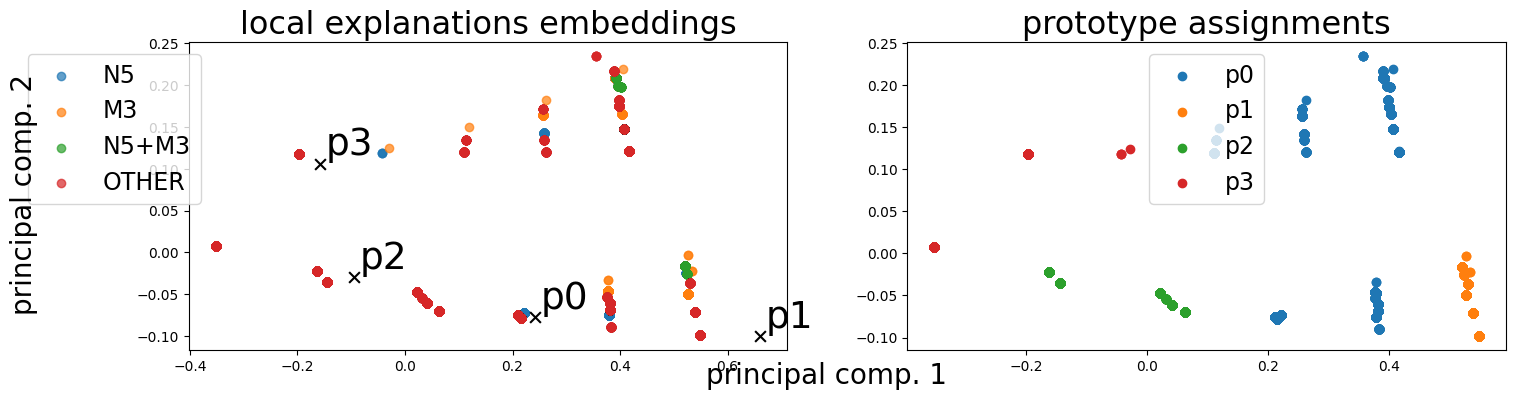

Alpha norms:
tensor([[0.2911, 0.0816, 0.1736, 1.0000],
        [1.0000, 0.0127, 0.0306, 0.1419]])
Concept Purity: 0.829813 +- 0.173464
Concept distribution:  (array([0, 1, 2, 3]), array([6813, 1615, 3804, 8511]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7821)

 80: Loss: 0.05773, LEN: 0.057618, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05888, V. LEN 0.058
 81: Loss: 0.05811, LEN: 0.057984, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05714, V. LEN 0.057
 82: Loss: 0.05811, LEN: 0.057996, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05667, V. LEN 0.056
 83: Loss: 0.05741, LEN: 0.057300, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05744, V. LEN 0.057
 84: Loss: 0.05791, LEN: 0.057779, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05731, V. LEN 0.057
 85: Loss: 0.05753, LEN: 0.057433, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05761, V. LEN 0.057
 86: Loss: 0.05780, LEN: 0.057695, Acc: 0.76, V. Acc: 0.82, V. Loss: 0.05814, V. LEN 0.058
 87: Loss: 0.05740, LEN: 0.057302,

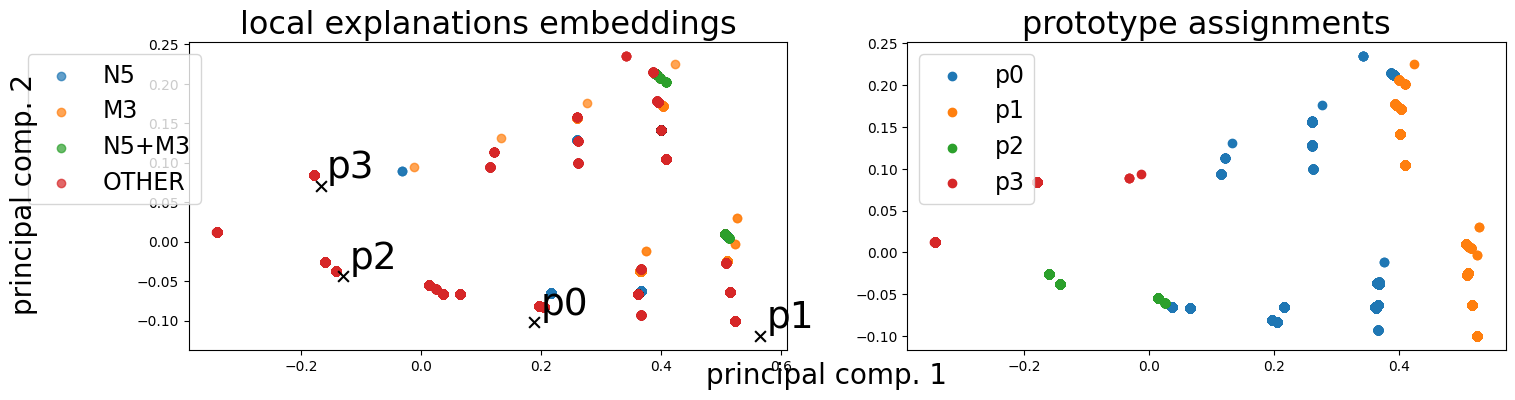

Alpha norms:
tensor([[0.2574, 0.0753, 0.1846, 1.0000],
        [1.0000, 0.0202, 0.0463, 0.1856]])
Concept Purity: 0.844268 +- 0.158510
Concept distribution:  (array([0, 1, 2, 3]), array([6809, 3662, 1761, 8511]))
Logic formulas:
For class 0:
0.7990344289476251 (feature0000000003) | (feature0000000000) | ((feature0000000001)
For class 1:
0.7990344289476251 (feature0000000002)
Accuracy as classifier:  0.799
LEN fidelity:  tensor(0.7990)

100: Loss: 0.05783, LEN: 0.057731, Acc: 0.77, V. Acc: 0.82, V. Loss: 0.05091, V. LEN 0.051
101: Loss: 0.05804, LEN: 0.057949, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05644, V. LEN 0.056
102: Loss: 0.05925, LEN: 0.059166, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05292, V. LEN 0.053
103: Loss: 0.06017, LEN: 0.060074, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05350, V. LEN 0.053
104: Loss: 0.05983, LEN: 0.059744, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05281, V. LEN 0.053
105: Loss: 0.05982, LEN: 0.059728, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05202, V. LEN 0.052
106: Loss: 0.0

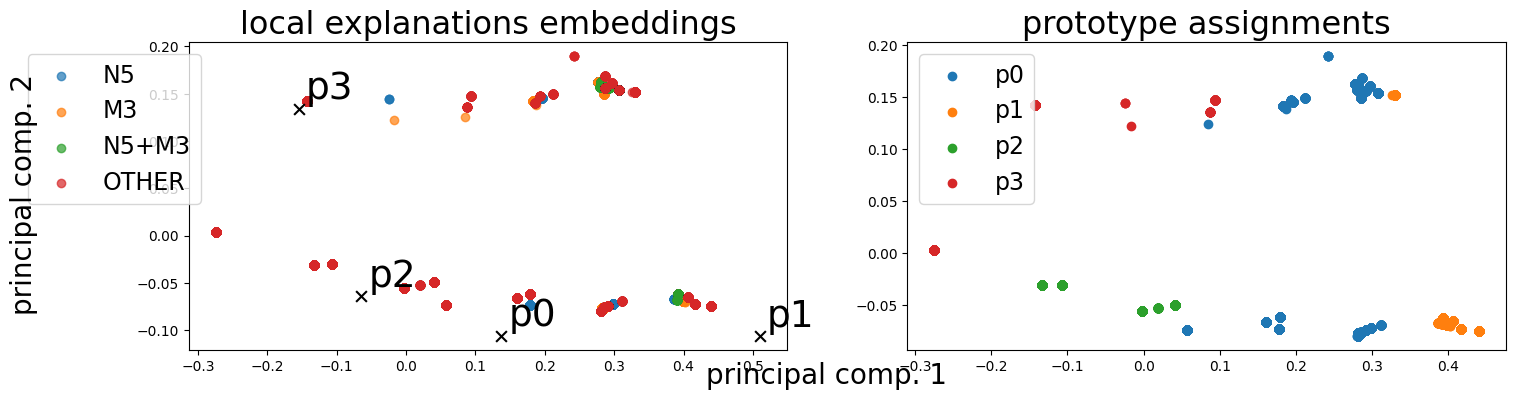

Alpha norms:
tensor([[0.1700, 0.0625, 0.1855, 1.0000],
        [1.0000, 0.0761, 0.1508, 0.3967]])
Concept Purity: 0.846606 +- 0.165172
Concept distribution:  (array([0, 1, 2, 3]), array([6731, 2145, 3236, 8631]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7821)


120: Loss: 0.06053, LEN: 0.060415, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05681, V. LEN 0.057
121: Loss: 0.06073, LEN: 0.060599, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05334, V. LEN 0.053
122: Loss: 0.06080, LEN: 0.060667, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05463, V. LEN 0.054
123: Loss: 0.06079, LEN: 0.060683, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05458, V. LEN 0.054
124: Loss: 0.06095, LEN: 0.060827, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05485, V. LEN 0.055
125: Loss: 0.06126, LEN: 0.061135, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05321, V. LEN 0.053
126: Loss: 0.06156, LEN: 0.061420, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05475, V. LEN 0.054
127: Loss: 0.06141, LEN: 0.061276

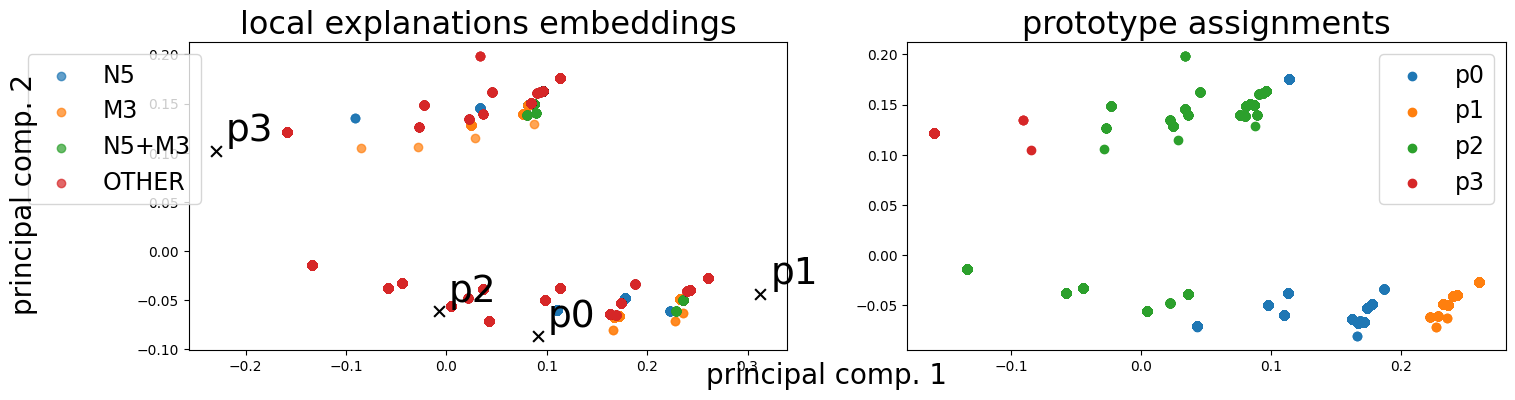

Alpha norms:
tensor([[0.1537, 0.0830, 0.1875, 1.0000],
        [1.0000, 0.3802, 0.3163, 0.9721]])
Concept Purity: 0.837006 +- 0.114262
Concept distribution:  (array([0, 1, 2, 3]), array([ 5011,  1615, 13512,   605]))
Logic formulas:
For class 0:
0.8209792255925095 (feature0000000003) | (feature0000000002) | (feature0000000000)
For class 1:
0.8209792255925095 (feature0000000001)
Accuracy as classifier:  0.821
LEN fidelity:  tensor(0.8210)

140: Loss: 0.06026, LEN: 0.060128, Acc: 0.76, V. Acc: 0.79, V. Loss: 0.05388, V. LEN 0.054
141: Loss: 0.05987, LEN: 0.059733, Acc: 0.79, V. Acc: 0.79, V. Loss: 0.05293, V. LEN 0.053
142: Loss: 0.05988, LEN: 0.059749, Acc: 0.79, V. Acc: 0.79, V. Loss: 0.05531, V. LEN 0.055
143: Loss: 0.05965, LEN: 0.059531, Acc: 0.79, V. Acc: 0.79, V. Loss: 0.05394, V. LEN 0.054
144: Loss: 0.05950, LEN: 0.059384, Acc: 0.79, V. Acc: 0.78, V. Loss: 0.05421, V. LEN 0.054
145: Loss: 0.05929, LEN: 0.059165, Acc: 0.79, V. Acc: 0.78, V. Loss: 0.05511, V. LEN 0.055
146: Loss: 

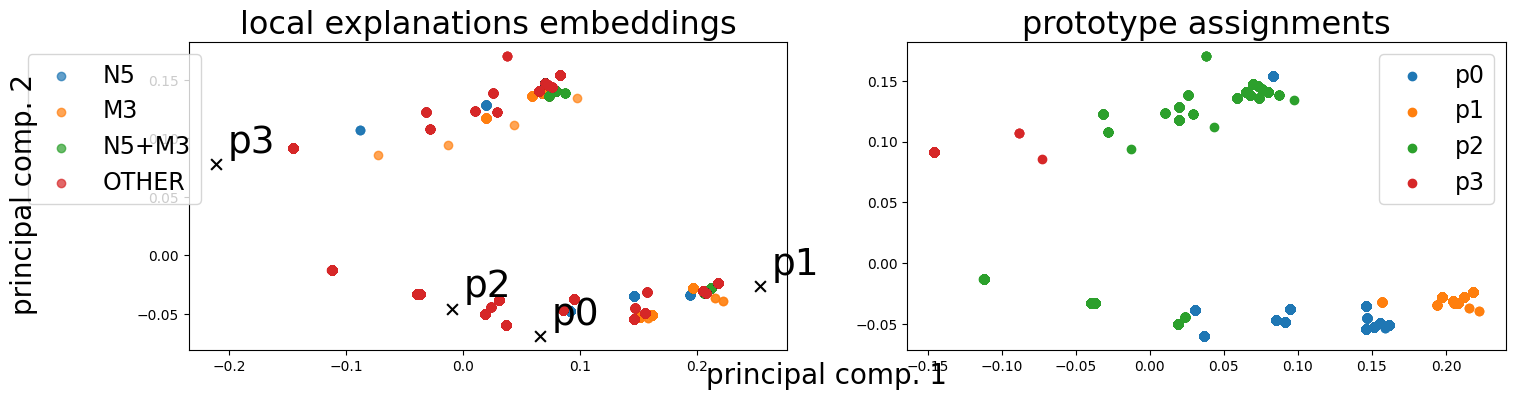

Alpha norms:
tensor([[0.1519, 0.0770, 0.1769, 1.0000],
        [0.9694, 0.4038, 0.3366, 1.0000]])
Concept Purity: 0.850422 +- 0.100915
Concept distribution:  (array([0, 1, 2, 3]), array([ 6422,  1679, 12037,   605]))
Logic formulas:
For class 0:
0.8241002633375597 (feature0000000003) | (feature0000000002) | (feature0000000000)
For class 1:
0.8241002633375597 (feature0000000001)
Accuracy as classifier:  0.8241
LEN fidelity:  tensor(0.8241)

160: Loss: 0.06044, LEN: 0.060293, Acc: 0.74, V. Acc: 0.79, V. Loss: 0.05248, V. LEN 0.052
161: Loss: 0.06003, LEN: 0.059894, Acc: 0.78, V. Acc: 0.79, V. Loss: 0.05481, V. LEN 0.055
162: Loss: 0.06030, LEN: 0.060173, Acc: 0.77, V. Acc: 0.82, V. Loss: 0.05676, V. LEN 0.057
163: Loss: 0.06004, LEN: 0.059897, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05369, V. LEN 0.053
164: Loss: 0.06017, LEN: 0.060027, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05705, V. LEN 0.057
165: Loss: 0.06030, LEN: 0.060174, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05504, V. LEN 0.055
166: Loss:

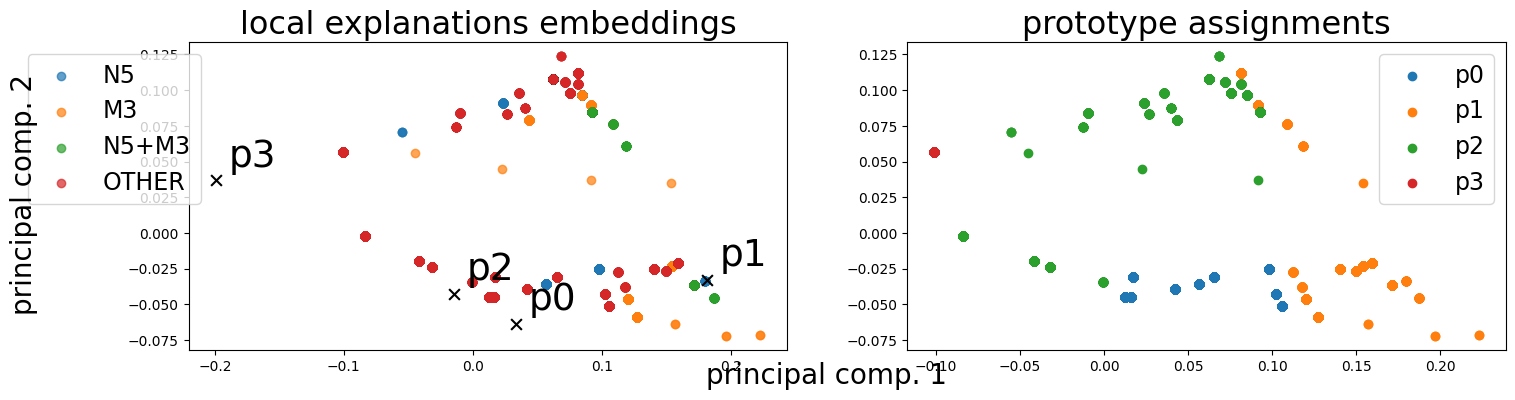

Alpha norms:
tensor([[0.1766, 0.0750, 0.1625, 1.0000],
        [1.0000, 0.2709, 0.2976, 0.8078]])
Concept Purity: 0.841385 +- 0.142654
Concept distribution:  (array([0, 1, 2, 3]), array([ 5569,  2930, 11643,   601]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7821)

180: Loss: 0.06015, LEN: 0.059994, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05369, V. LEN 0.053
181: Loss: 0.06010, LEN: 0.059945, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05600, V. LEN 0.056
182: Loss: 0.05992, LEN: 0.059771, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05670, V. LEN 0.056
183: Loss: 0.06025, LEN: 0.060074, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05657, V. LEN 0.056
184: Loss: 0.06044, LEN: 0.060290, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05524, V. LEN 0.055
185: Loss: 0.06031, LEN: 0.060150, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05664, V. LEN 0.056
186: Loss: 0.06018, LEN: 0.060026, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05779, V. LEN 0.058
187: Loss: 0.06001, LEN: 0.059

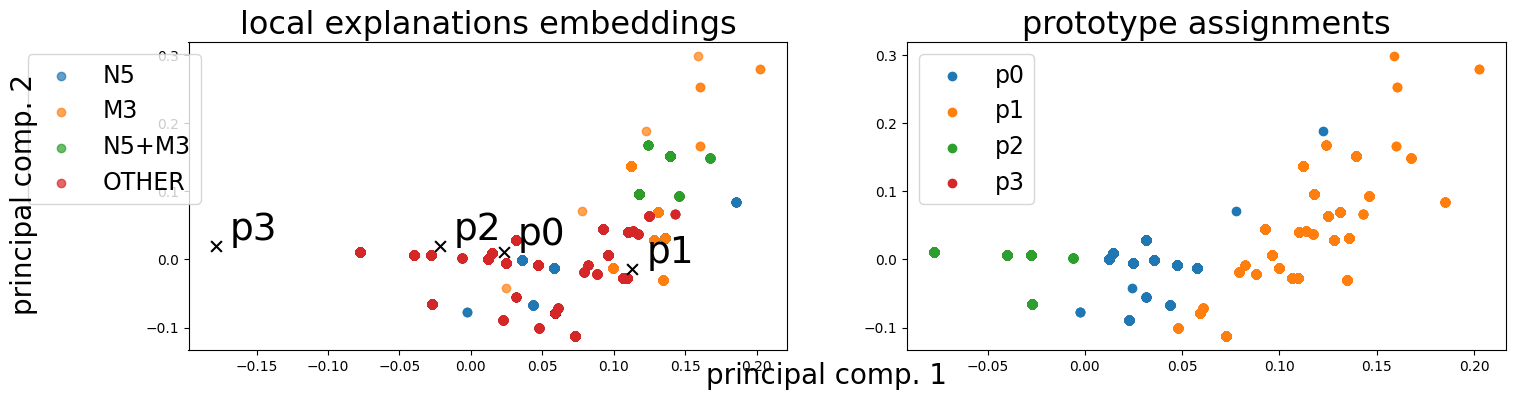

Alpha norms:
tensor([[0.2034, 0.0611, 0.1681, 1.0000],
        [1.0000, 0.1199, 0.1650, 0.3232]])
Concept Purity: 0.804066 +- 0.171897
Concept distribution:  (array([0, 1, 2]), array([ 5358,  5302, 10083]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.7821)

200: Loss: 0.05834, LEN: 0.058131, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05374, V. LEN 0.053
201: Loss: 0.05870, LEN: 0.058483, Acc: 0.78, V. Acc: 0.82, V. Loss: 0.05424, V. LEN 0.054
Early Stopping
Loading model at epoch 100
Model not loaded
Best epoch: 100
Trained lasted for 723 seconds


In [6]:
expl.iterate(train_group_loader, test_group_loader, plot=True)

(array([0., 1., 2., 3.], dtype=float32), array([ 684,  315,  107, 4589]))
[0.7884984  0.17255123]


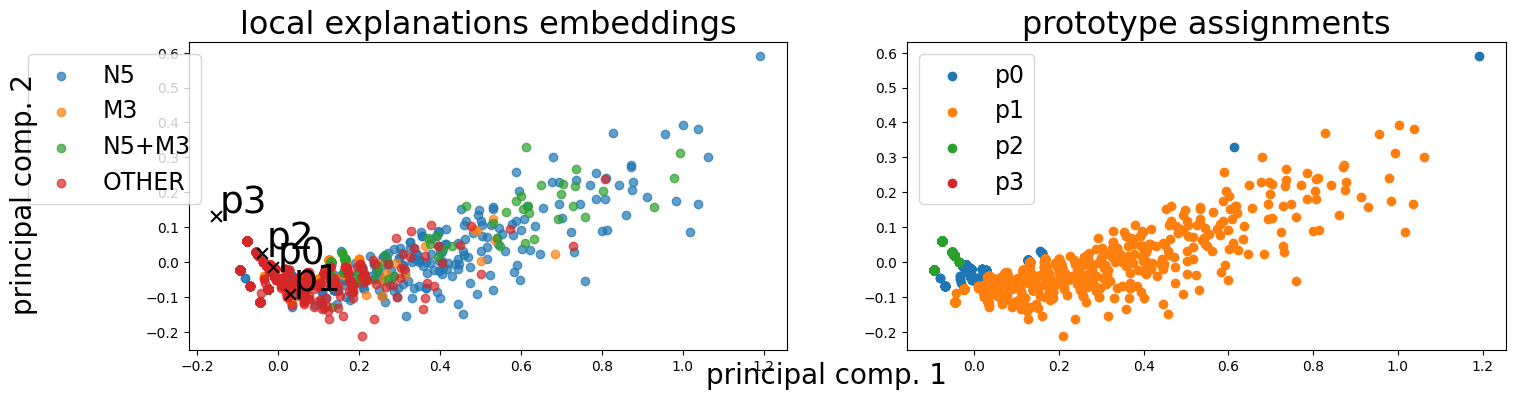

Alpha norms:
tensor([[0.1898, 0.0601, 0.1655, 1.0000],
        [1.0000, 0.1268, 0.1754, 0.3337]])
Concept Purity: 0.779503 +- 0.193826
Concept distribution:  (array([0, 1, 2]), array([1381, 1789, 2525]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.8200)


In [7]:
expl.inspect(test_group_loader)

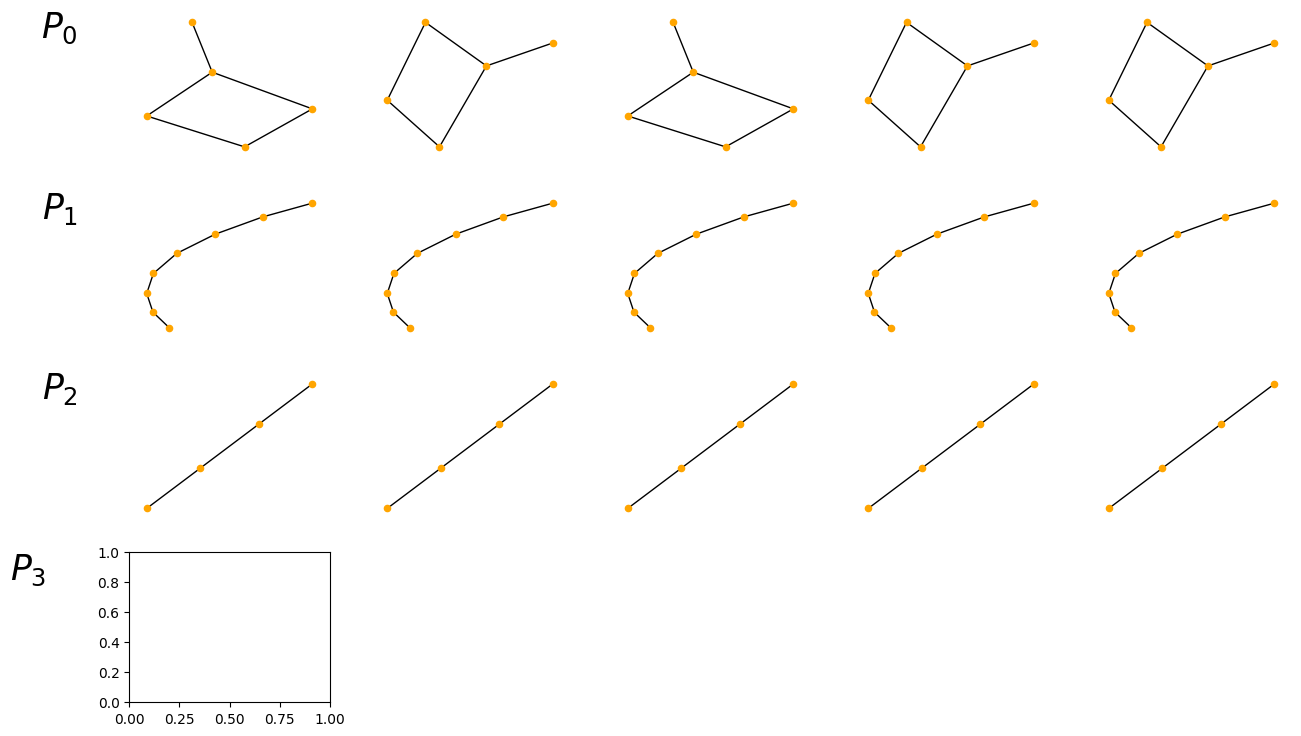

In [8]:
expl.hyper["assign_func"] = "sim"

x_train, emb, concepts_assignement, y_train_1h, le_classes, le_idxs, belonging = expl.get_concept_vector(
	test_group_loader,
	return_raw=True)
expl.hyper["assign_func"] = "discrete"

proto_names = {
	0: "BA",
	1: "Wheel",
	2: "Mix",
	3: "Grid",
	4: "House",
	5: "Grid",
}
torch.manual_seed(42)
fig = plt.figure(figsize=(15, 5 * 1.8))
n = 0
for p in range(expl.hyper["num_prototypes"]):
	idxs = le_idxs[concepts_assignement.argmax(-1) == p]
	# idxs = idxs[torch.randperm(len(idxs))]    # random
	sa = concepts_assignement[concepts_assignement.argmax(-1) == p]
	idxs = idxs[torch.argsort(sa[:, p], descending=True)]
	for ex in range(min(5, len(idxs))):
		n += 1
		ax = plt.subplot(expl.hyper["num_prototypes"], 5, n)
		G = to_networkx(dataset_test[int(idxs[ex])], to_undirected=True,
						remove_self_loops=True)
		pos = nx.spring_layout(G, seed=42)
		nx.draw(G, pos, node_size=20, ax=ax, node_color="orange")
		ax.axis("on")
		plt.box(False)

for p in range(expl.hyper["num_prototypes"]):
	plt.subplot(expl.hyper["num_prototypes"], 5, 5 * p + 1)
	plt.ylabel(f"$P_{p}$\n", size=25, rotation="horizontal",
			   labelpad=50)

plt.show()

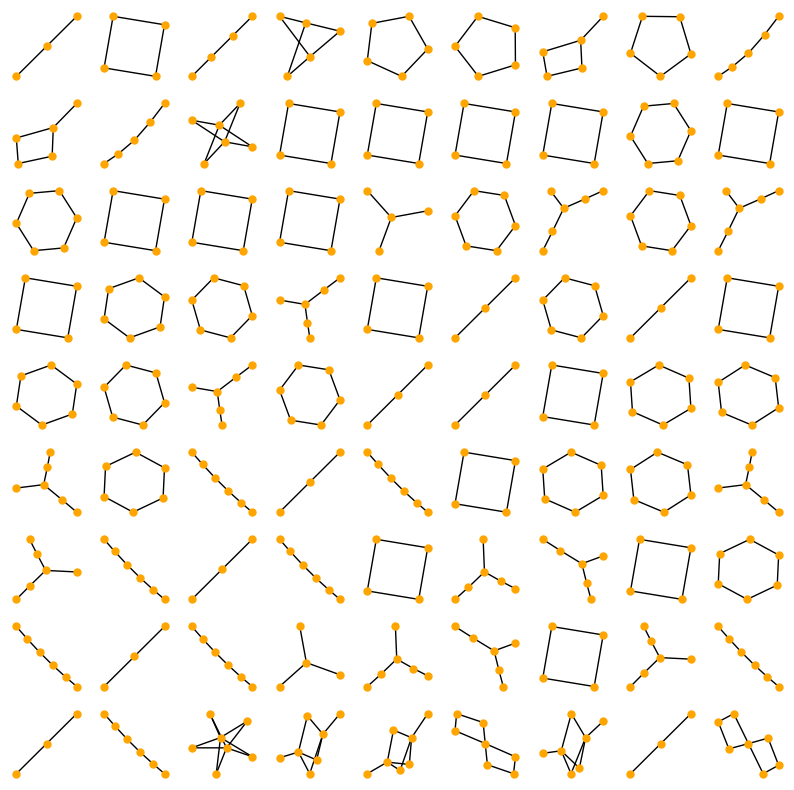

In [9]:
fig, axs = plt.subplots(9, 9, figsize=(10, 10))
axs = axs.flatten()

for i in range(81):
	G = nx.Graph(adjs_train[i], undirected=True)
	G.remove_edges_from(nx.selfloop_edges(G))
	pos = nx.spring_layout(G, seed=42)
	nx.draw(G, pos, ax=axs[i], node_color="orange", node_size=25)

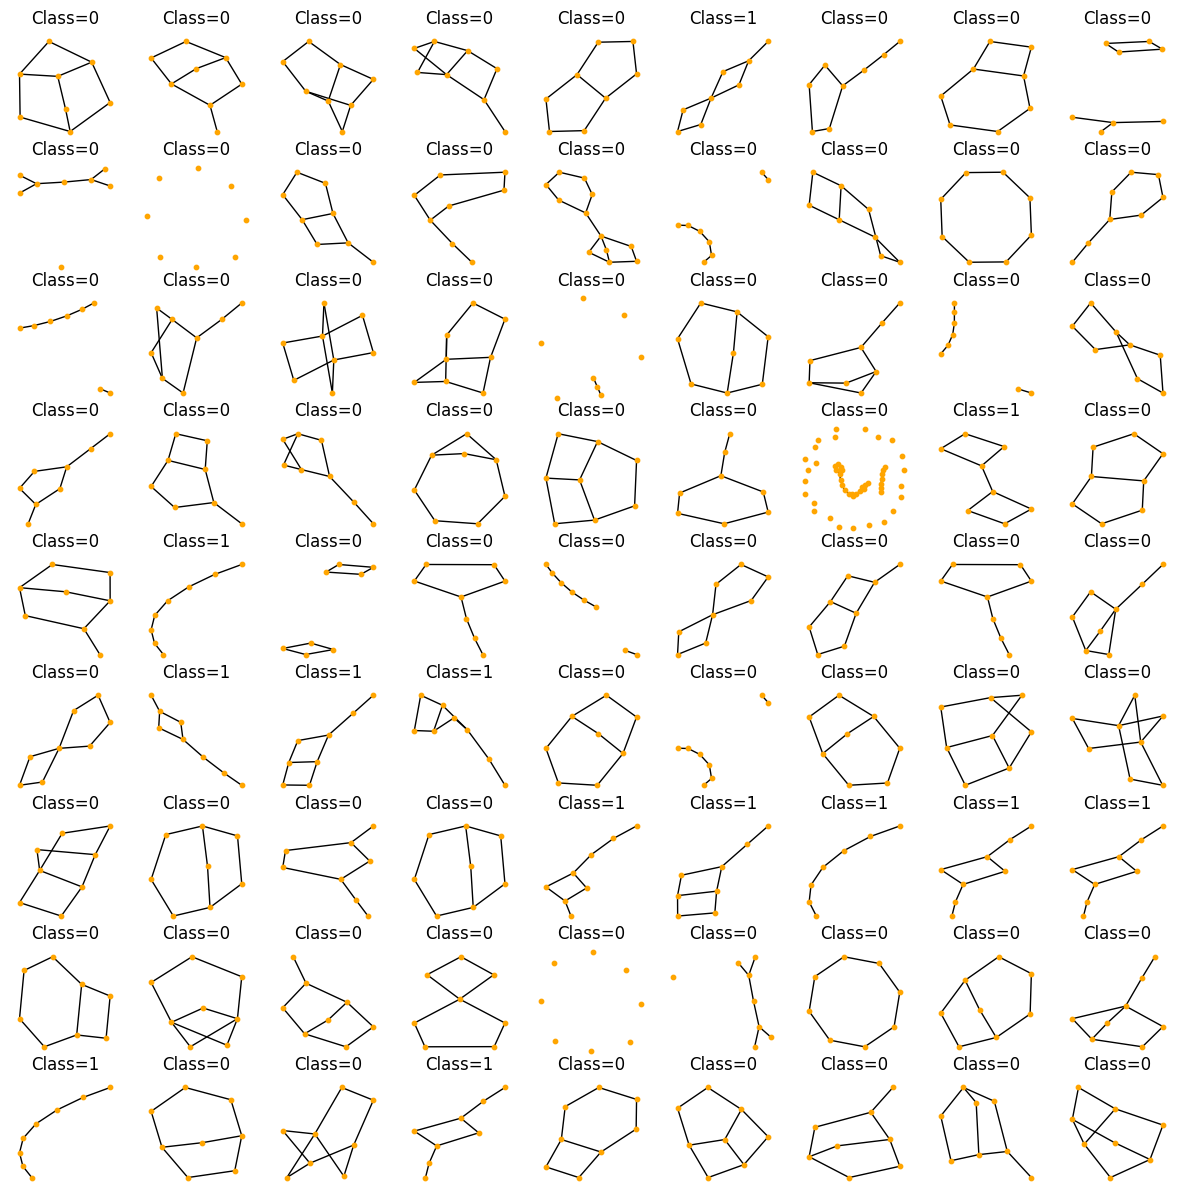

In [10]:
import numpy as np
data = np.load("local_features/PGExplainer/Distributive_weak/x_train.npz")
y = np.load("local_features/PGExplainer/Distributive_weak/y_train.npy")
adjs = list(data.values())

fig, axs = plt.subplots(9, 9, figsize=(15, 15))
axs = axs.flatten()

for i in range(81):
	adj = adjs[i].squeeze()
	adj[adj > 0] = 1
	G = nx.Graph(adj, undirected=True)
	G.remove_edges_from(nx.selfloop_edges(G))
	pos = nx.spring_layout(G, seed=42)
	nx.draw(G, pos, ax=axs[i], node_color="orange", node_size=10)
	axs[i].set_title(f'Class={y[i]}')